In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import warnings
import model_report as mr
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
file_info = "C:\\Users\\blgai\\OneDrive\\Documents\\School\\SMU\\Courses\\Fall 2021\\Capstone A\Data\\cleaned_chunked_v2.csv"
df = pd.read_csv(file_info, sep='\t')

In [3]:
df.head()

,url,code,category,language,title,summary,key_words,content,combined,nouns,compounds,comp_nouns,flat_comp_nouns,clean_comp_nouns
0,*://BLAZINHERB.CA,200,dr,en,Blazin Herb,The Diamond High Crew,Blazin herb,Blazin Herb THC Edibles Concentrates Flower/bu...,Blazin Herb The Diamond High Crew Blazin herb ...,"[('Blazin', 0, 6, 'PROPN'), ('Herb', 7, 11, 'P...","[('Blazin Herb', 0, 11, 'COMPOUND'), ('Diamond...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...","{'Read', 'Picks', 'DIAMOND', 'bud', 'THC', 'So...",read picks diamond bud thc social sleep club r...
1,*://THEHONEYPOTSTORE.CA,200,dr,en,The Honey Pot Cannabis and Medical Marijuana p...,"The Honey Pot Hamilton Ontario, provides canna...","The Honey Pot ,Georgia Peach Cannabis and Medi...",The Honey Pot Home About Us F.A.Q.'s About The...,The Honey Pot Cannabis and Medical Marijuana p...,"[('Honey', 4, 9, 'PROPN'), ('Pot', 10, 13, 'PR...","[('Honey Pot Cannabis', 4, 22, 'COMPOUND'), ('...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...","{'appetite', 'Stress', 'Muscle', 'Hepatitis C'...",appetite stress muscle hepatitis c hamilton hi...
2,*://AMANTE.CA,200,dr,en,Amante Organics - Licensed Certified Organic C...,np-template-header-footer-from-plugin,"Organic Cannabis, Certified Organic, Weed, Org...",Amante Organics LOCAL | ORGANIC | SUSTAINABLE ...,Amante Organics - Licensed Certified Organic C...,"[('Amante', 0, 6, 'PROPN'), ('Organics', 7, 15...","[('Amante Organics -', 0, 17, 'COMPOUND'), ('O...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...","{'nations', 'Rights Reserved', ""a'mante"", 'Lic...",nation rights reserved amante licensed np head...
3,*://CANNAFLY.CA,200,dr,en,Cannafly,Cannafly,"Marijuana, cannabis, medical marijuana, dispen...",Vancouver's Premium Mobile Medicinal Cannabis ...,"Cannafly Cannafly Marijuana, cannabis, medical...","[('Cannafly', 0, 8, 'PROPN'), ('Cannafly', 9, ...","[('marijuana legalization', 70, 92, 'COMPOUND'...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...","{'chilliwack', 'Connoisseurs', 'THC', 'industr...",chilliwack connoisseurs thc industry death bub...
4,*://GRON.VC,200,dr,en,Grøn Ventures,We are backing businesses and brands with pote...,"cannabis vc, cannabis venture capital, gron ve...","GRØN VENTURES 4675 MacArthur Ct, 15th Floor, N...",Grøn Ventures We are backing businesses and br...,"[('Grøn', 0, 4, 'PROPN'), ('Ventures', 5, 13, ...","[('Grøn Ventures', 0, 13, 'COMPOUND'), ('marke...","{'marijuana', 'Beach', 'Newport', 'ventures', ...","{'marijuana', 'Beach', 'Newport', 'ventures', ...",marijuana beach newport venture ct ventures ma...


In [4]:
df.groupby(df.category).size()

category
bu    11731
dr     1595
ed     3894
mk     8775
os     6789
sp     2535
sx     6557
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
#get 10% holdout set
train_corpus, holdout_corpus, train_label, holdout_label = train_test_split(df['clean_comp_nouns'], 
                                                                           df['category'],
                                                                           test_size=.10,random_state=1234)

#get 80% train and 20% test sets
train_corpus, test_corpus, train_label, test_label = train_test_split(train_corpus,
                                                                      train_label,
                                                                      test_size=.2225,random_state=1234) #.9 * .2225 = .20

train_corpus.shape, test_corpus.shape, holdout_corpus.shape

((29302,), (8386,), (4188,))

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

#build BOW features on train corpus
tv = TfidfVectorizer(use_idf=True, min_df=0.0,max_df=1.0, norm="l2",smooth_idf=True)
tv_train_features = tv.fit_transform(train_corpus)
#transform test corpus into features
tv_test_features = tv.transform(test_corpus)
#transform holdout corpus into features
tv_holdout_features = tv.transform(holdout_corpus)

print('TFIDF model:> Train features shape:',tv_train_features.shape,'Test features shape:',tv_test_features.shape,'Holdout features shape:',tv_holdout_features.shape)

TFIDF model:> Train features shape: (29302, 344693) Test features shape: (8386, 344693) Holdout features shape: (4188, 344693)


In [7]:
#Let's find the top important features and analyze them

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_opt=SelectKBest(chi2, k=1500)
tv_train_features_trimmed = X_opt.fit_transform(tv_train_features, train_label)
tv_train_features_trimmed.shape

(29302, 1500)

In [8]:
#create a data frame that includes all features and whether or not they are deemed important by feature_selection
feat_imp = pd.DataFrame(list(zip(tv.get_feature_names(),X_opt.get_support().tolist())),columns = ['Features','Important'])
feat_imp[feat_imp.Important == True]

,Features,Important
1118,abroad,True
1331,academic,True
1345,academics,True
1352,academy,True
1558,accessories,True
...,...,...
341278,young,True
341545,youth,True
342144,zaden,True
342324,zambeza,True


In [9]:
#Now we can grab the important features so that we can select only the important features from the sparse matrix created by TfidfVectorizer
imp_Feats_array = np.array(feat_imp[feat_imp.Important == True].index)

In [10]:
#Now we can pull only the important features out of the original train, test, and holdout matrices
tv_train_features_sub = tv_train_features[:,imp_Feats_array]
tv_test_features_sub = tv_test_features[:,imp_Feats_array]
tv_holdout_features_sub = tv_holdout_features[:,imp_Feats_array]

#Examine the new shapes of the sub-selected features
print('TFIDF model:> Train features shape:',tv_train_features_sub.shape,'Test features shape:',tv_test_features_sub.shape,'Holdout features shape:',tv_holdout_features_sub.shape)

TFIDF model:> Train features shape: (29302, 1500) Test features shape: (8386, 1500) Holdout features shape: (4188, 1500)


In [28]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(loss='log',penalty='l2',class_weight={'dr':8,'sx':10},random_state=1234)
clf.fit(tv_train_features_sub,train_label)

SGDClassifier(class_weight={'dr': 8, 'sx': 10}, loss='log', random_state=1234)

In [29]:
svm_tfidf_cv_scores = cross_val_score(clf,tv_train_features_sub,train_label,cv=5)
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
print('CV Accuracy (5-fold):',svm_tfidf_cv_scores)
print('Mean CV Accuracy:',svm_tfidf_cv_mean_score)

CV Accuracy (5-fold): [0.81 0.81 0.82 0.82 0.82]
Mean CV Accuracy: 0.816941097891832


In [30]:
svm_tfidf_test_score = clf.score(tv_test_features_sub,test_label)
print('Test Accuracy:',svm_tfidf_test_score)

Test Accuracy: 0.8248270927736704


In [31]:
import model_evaluation_utils as meu
svm_predictions = clf.predict(tv_test_features_sub)
meu.get_metrics(true_labels=test_label,predicted_labels=svm_predictions)

Accuracy: 0.8248
Precision: 0.8299
Recall: 0.8248
F1 Score: 0.8239


In [32]:
unique_classes = list(set(test_label))
meu.display_classification_report(true_labels=test_label,predicted_labels=svm_predictions,classes=unique_classes)

              precision    recall  f1-score   support

          os       0.83      0.74      0.78      1393
          sx       0.93      1.00      0.96      1345
          dr       0.97      0.91      0.94       307
          bu       0.77      0.89      0.83      2355
          mk       0.71      0.71      0.71      1709
          sp       0.96      0.76      0.85       494
          ed       0.95      0.75      0.84       783

    accuracy                           0.82      8386
   macro avg       0.87      0.82      0.84      8386
weighted avg       0.83      0.82      0.82      8386



Confusion matrix, without normalization
[[1034   14    4    6  188   24  123]
 [   8  586    0    6   58   17  108]
 [  11    0  279    0    5    8    4]
 [  15    6    0  376   49   23   25]
 [ 114    8    2    3 1207   24  351]
 [   0    0    0    0    2 1342    1]
 [  64    6    2    1  184    5 2093]]


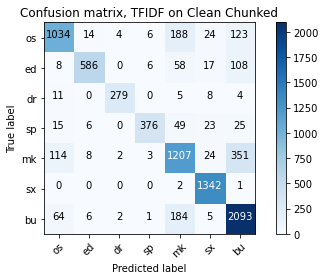

In [33]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(test_label,svm_predictions,labels=['os','ed','dr','sp','mk','sx','bu'])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
mr.plot_confusion_matrix(cnf_matrix, classes=['os','ed','dr','sp','mk','sx','bu'],
                      title='Confusion matrix, TFIDF on Clean Chunked')

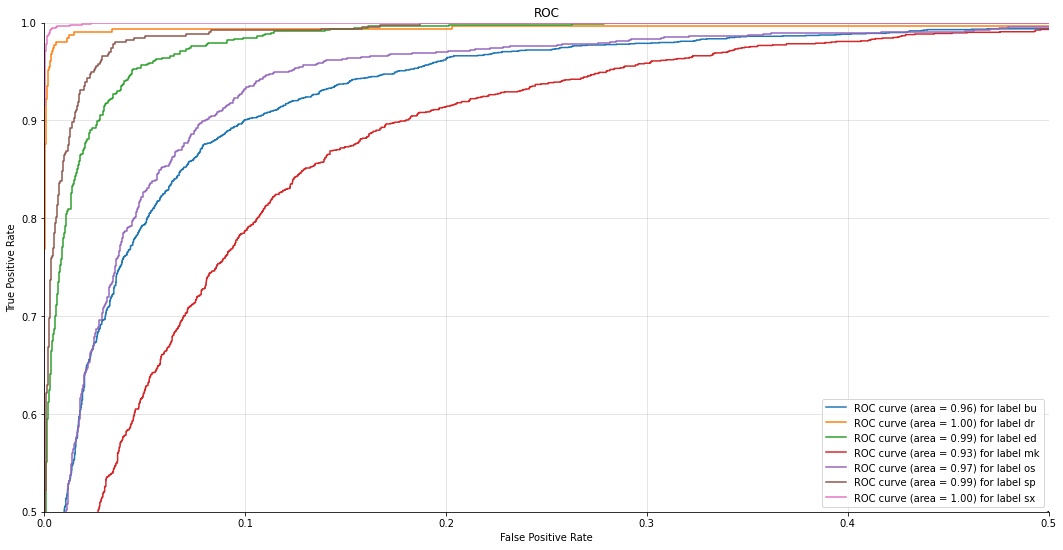

In [34]:
y_proba = clf.predict_proba(tv_test_features_sub)

labels_dict = dict(zip(df.category,df.category))
target_names = sorted(list(labels_dict.values()))

mr.plot_roc_curve(labels=test_label, predictions=y_proba, x_lim=[0.0,0.5], y_lim=[0.5,1.0], target_names=target_names)